In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from keras_visualizer import visualizer
from IPython.core.display import Image, display


Generate testing data

In [9]:
t_start = 0
t_end = 10
t_steps = 10
t_range = np.linspace(t_start,t_end,t_steps)
seq = np.array([np.sin(2*np.pi*t/10) for t in t_range])
[print(num) for num in enumerate(seq)]
x_test = np.array(seq)
y_test = np.array(np.roll(seq, -1))

(0, 0.0)
(1, 0.6427876096865393)
(2, 0.984807753012208)
(3, 0.8660254037844386)
(4, 0.3420201433256689)
(5, -0.3420201433256682)
(6, -0.8660254037844388)
(7, -0.9848077530122081)
(8, -0.6427876096865396)
(9, -2.4492935982947064e-16)


Generate training data, in order to create training data for predicting the next value of the sine function based on the current value, generate n pairs of two-point sequences from the values in seq.

In [10]:
n_training_data_pairs = 100
x_train = np.array([])
y_train = np.array([])
for i in range(n_training_data_pairs):
    rand = np.random.randint(t_steps)
    x_train = np.append(x_train, seq[rand])
    y_train = np.append(y_train, seq[np.mod(rand + 1,t_steps)])

pdata = pd.DataFrame({'x':x_train,'y':y_train})
print(pdata)


               x         y
0   0.000000e+00  0.642788
1   0.000000e+00  0.642788
2   8.660254e-01  0.342020
3  -2.449294e-16  0.000000
4   8.660254e-01  0.342020
..           ...       ...
95  8.660254e-01  0.342020
96 -2.449294e-16  0.000000
97 -8.660254e-01 -0.984808
98  0.000000e+00  0.642788
99 -9.848078e-01 -0.642788

[100 rows x 2 columns]


Scatterplot of training data

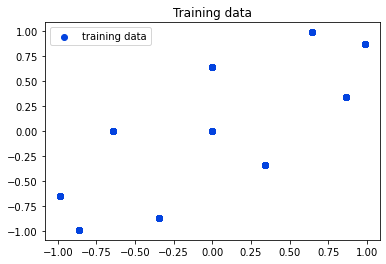

In [11]:
plt.scatter(pdata['x'],pdata['y'], color='xkcd:blue', marker='o', label='training data')
plt.title('Training data')
plt.legend()
plt.show()

Create a Dense, Sequential model with a single layer of 10 neurons.

In [17]:
def build_model():
    model = keras.Sequential([
        layers.Dense(10, activation='relu', input_shape=[1]),
        #layers.Dense(20, activation='relu'),
        #layers.Dense(10, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
    return model
model = build_model()

Visualize model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


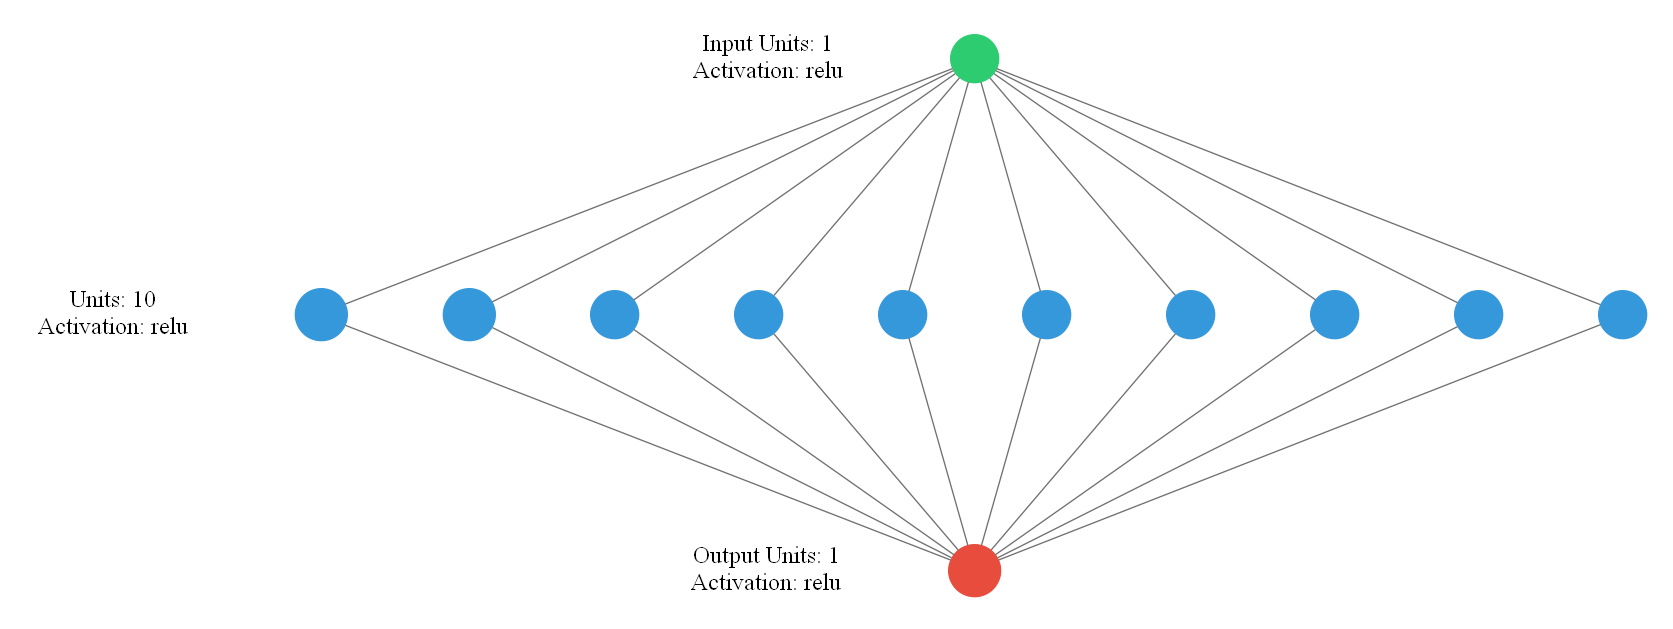

In [20]:
model.summary()
visualizer(model,format='png')
display((Image(filename='graph.png')))

In [21]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 200ms/step - loss: 0.3984 - accuracy: 0.0750 - val_loss: 0.4090 - val_accuracy: 0.1000
Epoch 2/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3941 - accuracy: 0.0750 - val_loss: 0.4045 - val_accuracy: 0.1000
Epoch 3/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3900 - accuracy: 0.0750 - val_loss: 0.4000 - val_accuracy: 0.1000
Epoch 4/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3859 - accuracy: 0.0750 - val_loss: 0.3956 - val_accuracy: 0.1000
Epoch 5/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3818 - accuracy: 0.0750 - val_loss: 0.3913 - val_accuracy: 0.1000
Epoch 6/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.3779 - accuracy: 0.0750 - val_loss: 0.3870 - val_accuracy: 0.1000
Epoch 7/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3739 - accuracy: 0.0750 - val_loss: 0.3827 - val_accuracy: 0.1000
Epoch 8/1000

Epoch 59/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2454 - accuracy: 0.0750 - val_loss: 0.2404 - val_accuracy: 0.1000
Epoch 60/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2441 - accuracy: 0.0750 - val_loss: 0.2388 - val_accuracy: 0.1000
Epoch 61/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2428 - accuracy: 0.0750 - val_loss: 0.2373 - val_accuracy: 0.1000
Epoch 62/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2415 - accuracy: 0.0750 - val_loss: 0.2358 - val_accuracy: 0.1000
Epoch 63/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2402 - accuracy: 0.0750 - val_loss: 0.2343 - val_accuracy: 0.1000
Epoch 64/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2390 - accuracy: 0.0750 - val_loss: 0.2328 - val_accuracy: 0.1000
Epoch 65/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2378 - accuracy: 0.0750 - val_loss: 0.2314 - val_accuracy: 0.1000
Epoch 

1/1 [==============================] - 0s 16ms/step - loss: 0.2000 - accuracy: 0.0750 - val_loss: 0.1849 - val_accuracy: 0.1000
Epoch 117/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1996 - accuracy: 0.0750 - val_loss: 0.1843 - val_accuracy: 0.1000
Epoch 118/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1992 - accuracy: 0.0750 - val_loss: 0.1838 - val_accuracy: 0.1000
Epoch 119/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1988 - accuracy: 0.0750 - val_loss: 0.1833 - val_accuracy: 0.1000
Epoch 120/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1984 - accuracy: 0.0750 - val_loss: 0.1828 - val_accuracy: 0.1000
Epoch 121/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1980 - accuracy: 0.0750 - val_loss: 0.1823 - val_accuracy: 0.1000
Epoch 122/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1976 - accuracy: 0.0750 - val_loss: 0.1818 - val_accuracy: 0.1000
Epoch 123/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.1865 - accuracy: 0.0750 - val_loss: 0.1659 - val_accuracy: 0.1000
Epoch 174/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1864 - accuracy: 0.0750 - val_loss: 0.1657 - val_accuracy: 0.1000
Epoch 175/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1863 - accuracy: 0.0750 - val_loss: 0.1655 - val_accuracy: 0.1000
Epoch 176/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1862 - accuracy: 0.0750 - val_loss: 0.1653 - val_accuracy: 0.1000
Epoch 177/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1861 - accuracy: 0.0750 - val_loss: 0.1651 - val_accuracy: 0.1000
Epoch 178/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1860 - accuracy: 0.0750 - val_loss: 0.1650 - val_accuracy: 0.1000
Epoch 179/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1858 - accuracy: 0.0750 - val_loss: 0.1648 - val_accuracy: 0.1000
Epoch 180/1000

1/1 [==============================] - 0s 16ms/step - loss: 0.1815 - accuracy: 0.0750 - val_loss: 0.1582 - val_accuracy: 0.1000
Epoch 231/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1815 - accuracy: 0.0750 - val_loss: 0.1581 - val_accuracy: 0.1000
Epoch 232/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1814 - accuracy: 0.0750 - val_loss: 0.1580 - val_accuracy: 0.1000
Epoch 233/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1813 - accuracy: 0.0750 - val_loss: 0.1579 - val_accuracy: 0.1000
Epoch 234/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1813 - accuracy: 0.0750 - val_loss: 0.1578 - val_accuracy: 0.1000
Epoch 235/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1812 - accuracy: 0.0750 - val_loss: 0.1577 - val_accuracy: 0.1000
Epoch 236/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1812 - accuracy: 0.0750 - val_loss: 0.1576 - val_accuracy: 0.1000
Epoch 237/1000

1/1 [==============================] - 0s 24ms/step - loss: 0.1783 - accuracy: 0.0750 - val_loss: 0.1537 - val_accuracy: 0.1000
Epoch 288/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1782 - accuracy: 0.0750 - val_loss: 0.1536 - val_accuracy: 0.1000
Epoch 289/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1782 - accuracy: 0.0750 - val_loss: 0.1536 - val_accuracy: 0.1000
Epoch 290/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1781 - accuracy: 0.0750 - val_loss: 0.1535 - val_accuracy: 0.1000
Epoch 291/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1781 - accuracy: 0.0750 - val_loss: 0.1534 - val_accuracy: 0.1000
Epoch 292/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1780 - accuracy: 0.0750 - val_loss: 0.1534 - val_accuracy: 0.1000
Epoch 293/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1780 - accuracy: 0.0750 - val_loss: 0.1533 - val_accuracy: 0.1000
Epoch 294/1000

1/1 [==============================] - 0s 18ms/step - loss: 0.1760 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 345/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1760 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 346/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1760 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 347/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1760 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 348/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1760 - accuracy: 0.0750 - val_loss: 0.1508 - val_accuracy: 0.1000
Epoch 349/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1759 - accuracy: 0.0750 - val_loss: 0.1508 - val_accuracy: 0.1000
Epoch 350/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1759 - accuracy: 0.0750 - val_loss: 0.1508 - val_accuracy: 0.1000
Epoch 351/1000

1/1 [==============================] - 0s 21ms/step - loss: 0.1748 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 402/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1748 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 403/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1748 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 404/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1748 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 405/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1748 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 406/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1748 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 407/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1748 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 408/1000

1/1 [==============================] - 0s 18ms/step - loss: 0.1740 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 459/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1740 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 460/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1740 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 461/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1740 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 462/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1740 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 463/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1740 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 464/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1740 - accuracy: 0.0750 - val_loss: 0.1501 - val_accuracy: 0.1000
Epoch 465/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.1733 - accuracy: 0.0750 - val_loss: 0.1503 - val_accuracy: 0.1000
Epoch 516/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1733 - accuracy: 0.0750 - val_loss: 0.1503 - val_accuracy: 0.1000
Epoch 517/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1733 - accuracy: 0.0750 - val_loss: 0.1503 - val_accuracy: 0.1000
Epoch 518/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1733 - accuracy: 0.0750 - val_loss: 0.1503 - val_accuracy: 0.1000
Epoch 519/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1733 - accuracy: 0.0750 - val_loss: 0.1503 - val_accuracy: 0.1000
Epoch 520/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1732 - accuracy: 0.0750 - val_loss: 0.1503 - val_accuracy: 0.1000
Epoch 521/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1732 - accuracy: 0.0750 - val_loss: 0.1503 - val_accuracy: 0.1000
Epoch 522/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.1726 - accuracy: 0.0750 - val_loss: 0.1505 - val_accuracy: 0.1000
Epoch 573/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1726 - accuracy: 0.0750 - val_loss: 0.1505 - val_accuracy: 0.1000
Epoch 574/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1726 - accuracy: 0.0750 - val_loss: 0.1505 - val_accuracy: 0.1000
Epoch 575/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1726 - accuracy: 0.0750 - val_loss: 0.1505 - val_accuracy: 0.1000
Epoch 576/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1726 - accuracy: 0.0750 - val_loss: 0.1505 - val_accuracy: 0.1000
Epoch 577/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1726 - accuracy: 0.0750 - val_loss: 0.1505 - val_accuracy: 0.1000
Epoch 578/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1726 - accuracy: 0.0750 - val_loss: 0.1506 - val_accuracy: 0.1000
Epoch 579/1000

1/1 [==============================] - 0s 15ms/step - loss: 0.1720 - accuracy: 0.0750 - val_loss: 0.1507 - val_accuracy: 0.1000
Epoch 630/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1720 - accuracy: 0.0750 - val_loss: 0.1507 - val_accuracy: 0.1000
Epoch 631/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1720 - accuracy: 0.0750 - val_loss: 0.1507 - val_accuracy: 0.1000
Epoch 632/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1719 - accuracy: 0.0750 - val_loss: 0.1507 - val_accuracy: 0.1000
Epoch 633/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1719 - accuracy: 0.0750 - val_loss: 0.1507 - val_accuracy: 0.1000
Epoch 634/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1719 - accuracy: 0.0750 - val_loss: 0.1507 - val_accuracy: 0.1000
Epoch 635/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1719 - accuracy: 0.0750 - val_loss: 0.1507 - val_accuracy: 0.1000
Epoch 636/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.1714 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 687/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1713 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 688/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1713 - accuracy: 0.0750 - val_loss: 0.1508 - val_accuracy: 0.1000
Epoch 689/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1713 - accuracy: 0.0750 - val_loss: 0.1508 - val_accuracy: 0.1000
Epoch 690/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1713 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 691/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1713 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 692/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1713 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 693/1000

1/1 [==============================] - 0s 20ms/step - loss: 0.1707 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 744/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1707 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 745/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1707 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 746/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1707 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 747/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1707 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 748/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1707 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 749/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1707 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 750/1000

1/1 [==============================] - 0s 15ms/step - loss: 0.1702 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 801/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1702 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 802/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1702 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 803/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1702 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 804/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1701 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 805/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1701 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 806/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1701 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 807/1000

1/1 [==============================] - 0s 16ms/step - loss: 0.1697 - accuracy: 0.0750 - val_loss: 0.1511 - val_accuracy: 0.1000
Epoch 858/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1697 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 859/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1696 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 860/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1696 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 861/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1696 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 862/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1696 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 863/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1696 - accuracy: 0.0750 - val_loss: 0.1511 - val_accuracy: 0.1000
Epoch 864/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.1691 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 915/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1691 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 916/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1691 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 917/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1691 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 918/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1691 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 919/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1691 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 920/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1691 - accuracy: 0.0750 - val_loss: 0.1510 - val_accuracy: 0.1000
Epoch 921/1000

1/1 [==============================] - 0s 23ms/step - loss: 0.1686 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 972/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1686 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 973/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1686 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 974/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1686 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 975/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1686 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 976/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1686 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 977/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1686 - accuracy: 0.0750 - val_loss: 0.1509 - val_accuracy: 0.1000
Epoch 978/1000

Review the training progress and performance, View the model's (historical) training progress via the history object

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Plot training history

In [ ]:
plt.plot(history.history['loss'], color='xkcd:blue')
plt.plot(history.history['val_loss'], color='xkcd:red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

Predict values using data in the test set

In [ ]:
y_pred = model.predict(x_test, batch_size=10).flatten()

Plot scatter of predictions vs test

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, color='blue')
_ = plt.plot([-2,2], [-2,2], color='xkcd:light grey')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show(

Visualize the predicted value versus the training (ie. true) values.

In [ ]:
plot_test = plt.plot(t_range, y_test,'x-', color='xkcd:blue', label='y_test')
plot_pred = plt.plot(t_range,y_pred,'o', color='xkcd:orange', label='y_pred')
plt.xlabel('x')
plt.ylabel('sin(x)')
test_patch = mpatches.Patch(color='xkcd:blue', label='test data')
pred_patch = mpatches.Patch(color='xkcd:orange', label='pred data')
plt.legend(handles = [test_patch, pred_patch])
plt.show()

Take a look at the error distribution.

In [ ]:
plt.hist(error, bins = 25, color='xkcd:blue')
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")
plt.show()

Print results for comparison.

In [ ]:
test_results = {}
test_results['ANN_1lay_model'] = model.evaluate(
    np.asarray(x_test),
    np.asarray(y_test),
    verbose=0)
pd.DataFrame(test_results,index = ['mse','accuracy']).transpose()
